# Experimental Analysis
This is an analysis of data collected for all experiments and batches.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

# personal libraries
from data_utils import *
from data_viz import *
import wallet

url = None
key = None
from private_variables import *    # contains url, key variables (empty if not connecting to MOOClet)

In [2]:
batch_num = {'hm_bl': [2101, 2102],
             'proto_bl': [3101, 3102],
             'hm_exp': [2001, 2002, 2003],
             'proto_exp': [3001, 3002],
             'multi_bl': [4000],
             'multi_exp': [4001]
             }
batch_data_dir = "batch_data"

mooclet_id = {'hm': 4, 'proto': 5, 'multi': 6}

load_data = True
num_iter = 6
include_testerbot = False
fig_save_dir = "./figures/"


In [3]:
report_filename = "report.txt"

report_file = open(report_filename,'w')
report_file.close()

# Data Processing
We first obtain the batch data from our server (or load from stored files).  We also create the metric `sim_score_norm` by subtracting each `sim_score` by the score of the initial iteration (baseline).

In [4]:
# Heatmap Baseline
hm_bl_batch = Batch(url, 
                 key, 
                 num_iter=num_iter, 
                 mooclet=mooclet_id['hm'], 
                 mturk_batch = batch_num['hm_bl'], 
                 include_testerbot=include_testerbot)
if load_data:
    hm_bl_batch.load_data(batch_data_dir+"/hm_bl_data.json")
    hm_bl_batch.load_learner_ids(batch_data_dir+"/hm_bl_learner_ids.json")
    hm_bl_batch.load_actions(batch_data_dir+"/hm_bl_actions.json")
else:
    hm_bl_batch.get_data()
hm_bl_batch.normalize_values(variables=['sim_score'], baseline_iter_num=1)

# Heatmap RBP
hm_exp_batch = Batch(url, 
                 key, 
                 num_iter=num_iter, 
                 mooclet=mooclet_id['hm'], 
                 mturk_batch = batch_num['hm_exp'], 
                 include_testerbot=include_testerbot)
if load_data:
    hm_exp_batch.load_data(batch_data_dir+"/hm_exp_data.json")
    hm_exp_batch.load_learner_ids(batch_data_dir+"/hm_exp_learner_ids.json")
    hm_exp_batch.load_actions(batch_data_dir+"/hm_exp_actions.json")
else:
    hm_exp_batch.get_data()
hm_exp_batch.normalize_values(variables=['sim_score'], baseline_iter_num=1)

# Prototype Baseline
proto_bl_batch = Batch(url, 
                 key, 
                 num_iter=num_iter, 
                 mooclet=mooclet_id['proto'], 
                 mturk_batch = batch_num['proto_bl'], 
                 include_testerbot=include_testerbot)
if load_data:
    proto_bl_batch.load_data(batch_data_dir+"/proto_bl_data.json")
    proto_bl_batch.load_learner_ids(batch_data_dir+"/proto_bl_learner_ids.json")
    proto_bl_batch.load_actions(batch_data_dir+"/proto_bl_actions.json")
else:
    proto_bl_batch.get_data()
proto_bl_batch.normalize_values(variables=['sim_score'], baseline_iter_num=1)

# Prototype RBP
proto_exp_batch = Batch(url, 
                 key, 
                 num_iter=num_iter, 
                 mooclet=mooclet_id['proto'], 
                 mturk_batch = batch_num['proto_exp'], 
                 include_testerbot=include_testerbot)
if load_data:
    proto_exp_batch.load_data(batch_data_dir+"/proto_exp_data.json")
    proto_exp_batch.load_learner_ids(batch_data_dir+"/proto_exp_learner_ids.json")
    proto_exp_batch.load_actions(batch_data_dir+"/proto_exp_actions.json")
else:
    proto_exp_batch.get_data()
proto_exp_batch.normalize_values(variables=['sim_score'], baseline_iter_num=1)

# Multi Baseline
multi_bl_batch = Batch(url, 
                 key, 
                 num_iter=num_iter, 
                 mooclet=mooclet_id['multi'], 
                 mturk_batch = batch_num['multi_bl'], 
                 include_testerbot=include_testerbot)
if load_data:
    multi_bl_batch.load_data(batch_data_dir+"/multi_bl_data.json")
    multi_bl_batch.load_learner_ids(batch_data_dir+"/multi_bl_learner_ids.json")
    multi_bl_batch.load_actions(batch_data_dir+"/multi_bl_actions.json")
else:
    multi_bl_batch.get_data()
multi_bl_batch.normalize_values(variables=['sim_score'], baseline_iter_num=1)


# Prototype RBP
multi_exp_batch = Batch(url, 
                 key, 
                 num_iter=num_iter, 
                 mooclet=mooclet_id['multi'], 
                 mturk_batch = batch_num['multi_exp'], 
                 include_testerbot=include_testerbot)
if load_data:
    multi_exp_batch.load_data(batch_data_dir+"/multi_exp_data.json")
    multi_exp_batch.load_learner_ids(batch_data_dir+"/multi_exp_learner_ids.json")
    multi_exp_batch.load_actions(batch_data_dir+"/multi_exp_actions.json")
else:
    multi_exp_batch.get_data()
multi_exp_batch.normalize_values(variables=['sim_score'], baseline_iter_num=1)


In [5]:
batches = {}
batches['hm_bl'] = hm_bl_batch
batches['hm_exp'] = hm_exp_batch
batches['proto_bl'] = proto_bl_batch
batches['proto_exp'] = proto_exp_batch
batches['multi_bl'] = multi_bl_batch
batches['multi_exp'] = multi_exp_batch

We save the data for each batch as .json files.

In [6]:
if load_data is False:
    if not os.path.exists(batch_data_dir):
        os.makedirs(batch_data_dir)
    for batch in ["multi_bl", "multi_exp"]:
        batches[batch].save_data(batch_data_dir+"/"+batch+"_data.json")
        batches[batch].save_learner_ids(batch_data_dir+"/"+batch+"_learner_ids.json")

We now group each set of batches into experiments.  The following experiments are available:
- Saliency Maps: random policy (baseline) v. rule-based policy
- Prototypes: random policy (baseline) v. rule-based policy
- Saliency Maps and Prototypes: random policy (baseline) v. rule-based policy

In [7]:
experiments = {}
experiments['hm'] = Experiment(hm_bl_batch, hm_exp_batch)
experiments['proto'] = Experiment(proto_bl_batch, proto_exp_batch)
experiments['multi'] = Experiment(multi_bl_batch, multi_exp_batch)
#experiments['bl'] = Experiment(hm_bl_batch, proto_bl_batch)
#experiments['exp'] = Experiment(hm_exp_batch, proto_exp_batch)

## Participant Information
We look at measures of the progress of our population:
- how many were flagged as bots
- how many completed and passed pre-assessment
- how many participated in the study

'hm_bl'

'hm_exp'

'proto_bl'

'proto_exp'

'multi_bl'

'multi_exp'

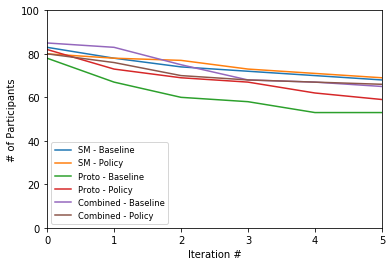

In [8]:
participation = {}
for batch in batches:
    display(batch)
    participation[batch] = []
    bot_count, bot_dict = batches[batch].count_bots()
    # display("We found "+str(bot_count)+" learners who have been flagged as bots.")
    
    pa_count, _, pa_dict = batches[batch].count_progress("pa")
    # display("We found "+str(pa_count)+" learners who have completed the pre-assessment.")
    
    passed_count = 0
    for learner in pa_dict:
        if pa_dict[learner]['pre_assess_score']['value'] >= 3.0:
            passed_count += 1
    # display(str(passed_count)+" out of "+str(pa_count)+" learners received a score of 3.0 or higher.")
    
    for i in range(1, 6+1):
        iter_count, _, _ = batches[batch].count_progress(i)
        participation[batch].append(iter_count)

participation = pd.DataFrame.from_dict(participation)
ax = participation.plot.line()

ax.set_ylim(0, 100)
ax.set_ylabel("# of Participants")
ax.set_xlabel("Iteration #")

L=plt.legend()
labels = ['SM - Baseline', 'SM - Policy', 'Proto - Baseline', 'Proto - Policy', \
                                    'Combined - Baseline', 'Combined - Policy']
ax.legend(labels=labels, loc='lower left', fontsize='small')

if not os.path.exists(fig_save_dir):
    os.makedirs(fig_save_dir)
plt.savefig(fig_save_dir+"participation.png", format="png", dpi=1200, bbox_inches="tight")

## Simulatability Score
We analyse how the simulatability score changes for each batch and for each iteration.

### Comparison of Baseline and Experimental Simulatability Score
We compare the mean simulatability score `sim_score` for each iteration for both the baseline and experimental batches.  To account for expertise variance between different participant groups (e.g., participants in one batch may perform better than participants in another batch), we also compare `sim_score_norm`.  

We set the error bars to represent standard error.

'Experiment: hm'

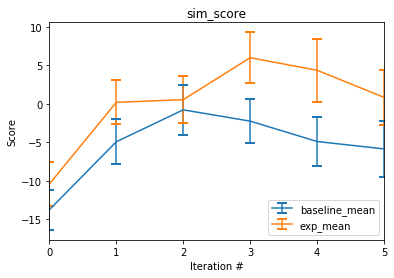

'Experiment: proto'

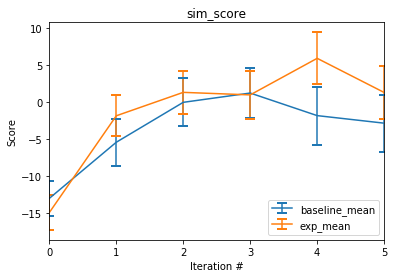

'Experiment: multi'

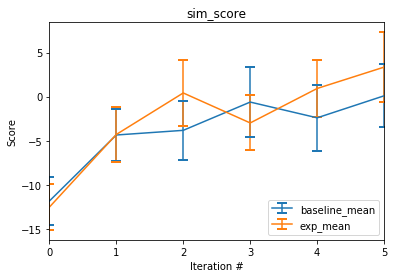

In [9]:
sim_scores = {}
for experiment in experiments:
    display("Experiment: "+str(experiment))
    sim_scores[experiment] = experiments[experiment].compare_scores_per_iter('sim_score', err='se')
    plt.show()

'Experiment: hm'

C:\Users\Arnold\Documents\University of Toronto\Thesis\Release\analysis\data_viz.py:31: RuntimeWarning: invalid value encountered in true_divide
  d = abs(mean[0] - mean[1]) / pooled_std


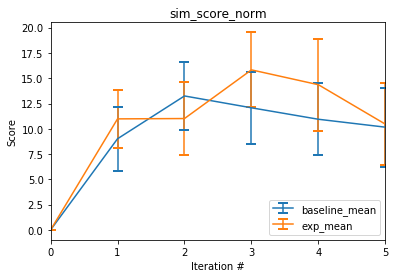

'Experiment: proto'

C:\Users\Arnold\Documents\University of Toronto\Thesis\Release\analysis\data_viz.py:31: RuntimeWarning: invalid value encountered in true_divide
  d = abs(mean[0] - mean[1]) / pooled_std


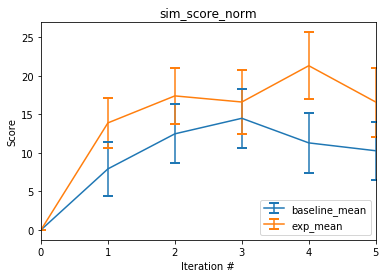

'Experiment: multi'

C:\Users\Arnold\Documents\University of Toronto\Thesis\Release\analysis\data_viz.py:31: RuntimeWarning: invalid value encountered in true_divide
  d = abs(mean[0] - mean[1]) / pooled_std


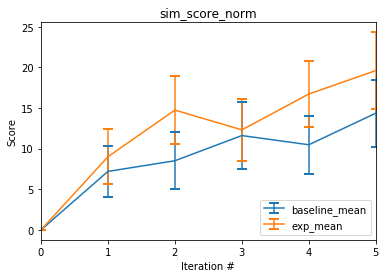

In [10]:
sim_scores_norm = {}
for experiment in experiments:
    display("Experiment: "+str(experiment))
    sim_scores_norm[experiment] = experiments[experiment].compare_scores_per_iter('sim_score_norm', err='se')
    plt.show()

### Effect Size Across Iterations

We calculate the difference between batches and iterations using the Cohen's d effect size.
Firstly, we calculate the effect size of each iteration, relative to the initial iteration (baseline).

Iteration: 1   Mean: -13.753012048192774   StD: 23.811338441547168   Count: 83
Iteration: 2   Mean: -4.915384615384617   StD: 25.87041170523194   Count: 78
Iteration: 1   Mean: -10.406249999999998   StD: 25.061748268343585   Count: 80
Iteration: 2   Mean: 0.20641025641025765   StD: 25.412985430775905   Count: 78
Iteration: 1   Mean: -13.753012048192774   StD: 23.811338441547168   Count: 83
Iteration: 3   Mean: -0.7702702702702705   StD: 27.973836747784645   Count: 74
Iteration: 1   Mean: -10.406249999999998   StD: 25.061748268343585   Count: 80
Iteration: 3   Mean: 0.550649350649351   StD: 26.463324289807826   Count: 77
Iteration: 1   Mean: -13.753012048192774   StD: 23.811338441547168   Count: 83
Iteration: 4   Mean: -2.236111111111112   StD: 24.33932831804107   Count: 72
Iteration: 1   Mean: -10.406249999999998   StD: 25.061748268343585   Count: 80
Iteration: 4   Mean: 6.002739726027397   StD: 28.25444396021202   Count: 73
Iteration: 1   Mean: -13.753012048192774   StD: 23.8113384415

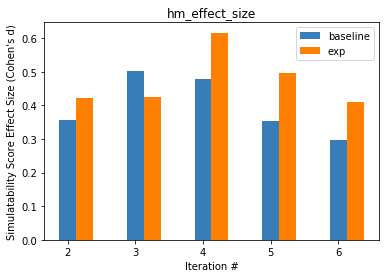

Iteration: 1   Mean: -13.033333333333331   StD: 21.041762226005634   Count: 78
Iteration: 2   Mean: -5.447761194029852   StD: 26.12958011589579   Count: 67
Iteration: 1   Mean: -14.951219512195125   StD: 21.23769211556811   Count: 82
Iteration: 2   Mean: -1.8726027397260272   StD: 23.496709345695695   Count: 73
Iteration: 1   Mean: -13.033333333333331   StD: 21.041762226005634   Count: 78
Iteration: 3   Mean: -0.05333333333333374   StD: 25.151860575223463   Count: 60
Iteration: 1   Mean: -14.951219512195125   StD: 21.23769211556811   Count: 82
Iteration: 3   Mean: 1.2942028985507248   StD: 24.073685194431278   Count: 69
Iteration: 1   Mean: -13.033333333333331   StD: 21.041762226005634   Count: 78
Iteration: 4   Mean: 1.2017241379310344   StD: 25.775205625666153   Count: 58
Iteration: 1   Mean: -14.951219512195125   StD: 21.23769211556811   Count: 82
Iteration: 4   Mean: 0.9507462686567166   StD: 26.409085747914595   Count: 67
Iteration: 1   Mean: -13.033333333333331   StD: 21.04176222

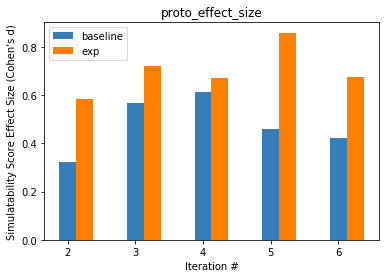

Iteration: 1   Mean: -11.840000000000002   StD: 25.184302556118066   Count: 85
Iteration: 2   Mean: -4.348192771084337   StD: 26.465234265784872   Count: 83
Iteration: 1   Mean: -12.532500000000002   StD: 23.042210990739846   Count: 80
Iteration: 2   Mean: -4.289473684210527   StD: 27.031747157480677   Count: 76
Iteration: 1   Mean: -11.840000000000002   StD: 25.184302556118066   Count: 85
Iteration: 3   Mean: -3.8200000000000016   StD: 28.810227163095906   Count: 75
Iteration: 1   Mean: -12.532500000000002   StD: 23.042210990739846   Count: 80
Iteration: 3   Mean: 0.41714285714285726   StD: 31.336129869476334   Count: 70
Iteration: 1   Mean: -11.840000000000002   StD: 25.184302556118066   Count: 85
Iteration: 4   Mean: -0.6147058823529412   StD: 32.31806141992515   Count: 68
Iteration: 1   Mean: -12.532500000000002   StD: 23.042210990739846   Count: 80
Iteration: 4   Mean: -2.980882352941176   StD: 25.695781971952748   Count: 68
Iteration: 1   Mean: -11.840000000000002   StD: 25.18430

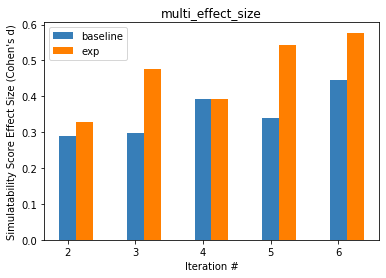

In [11]:
for experiment in experiments:
    bl_effect_size, exp_effect_size = experiments[experiment].plot_effect_sizes_per_iter('sim_score', 
                                                                                         baseline_iter_num=1,
                                                                                         title=experiment+"_effect_size")
    

### Plotting Effect Size with Simulatability Score Across Iterations

'hm'

Iteration: 1   Mean: 0.0   StD: 0.0   Count: 83
Iteration: 2   Mean: 9.014102564102565   StD: 28.024996840061338   Count: 78
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 80
Iteration: 2   Mean: 10.979487179487172   StD: 25.652788304306174   Count: 78
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 83
Iteration: 3   Mean: 13.24594594594595   StD: 28.81601147948965   Count: 74
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 80
Iteration: 3   Mean: 11.012987012987008   StD: 31.878999648545033   Count: 77
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 83
Iteration: 4   Mean: 12.075000000000003   StD: 30.242665273036067   Count: 72
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 80
Iteration: 4   Mean: 15.82602739726028   StD: 31.78252501767661   Count: 73
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 83
Iteration: 5   Mean: 10.941428571428572   StD: 29.784416180361315   Count: 70
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 80
Iteration: 5   Mean: 14.356338028169011   StD: 38.33693382327046   Count: 7

C:\Users\Arnold\Documents\University of Toronto\Thesis\Release\analysis\data_viz.py:31: RuntimeWarning: invalid value encountered in true_divide
  d = abs(mean[0] - mean[1]) / pooled_std


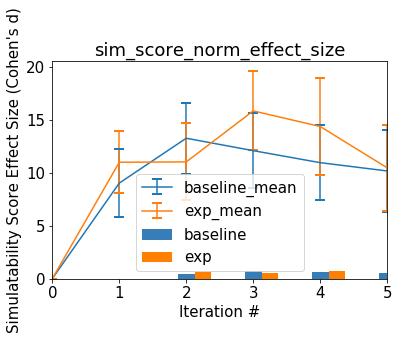

   baseline_err   exp_err
0      0.000000  0.000000
1      3.173206  2.904606
2      3.349793  3.632949
3      3.564132  3.719863
4      3.559919  4.549757
5      3.892037  4.072248


<Figure size 432x288 with 0 Axes>

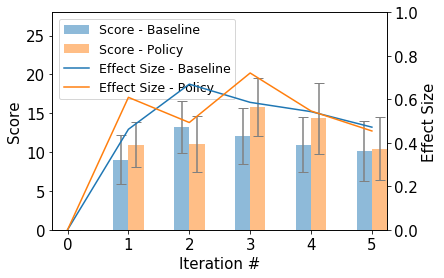

'proto'

C:\Users\Arnold\Documents\University of Toronto\Thesis\Release\analysis\data_viz.py:31: RuntimeWarning: invalid value encountered in true_divide
  d = abs(mean[0] - mean[1]) / pooled_std


Iteration: 1   Mean: 0.0   StD: 0.0   Count: 78
Iteration: 2   Mean: 7.920895522388061   StD: 28.7967776885973   Count: 67
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 82
Iteration: 2   Mean: 13.889041095890406   StD: 27.51368629954835   Count: 73
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 78
Iteration: 3   Mean: 12.470000000000002   StD: 29.54939730952109   Count: 60
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 82
Iteration: 3   Mean: 17.39275362318841   StD: 30.239092923490027   Count: 69
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 78
Iteration: 4   Mean: 14.486206896551725   StD: 29.017390117300366   Count: 58
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 82
Iteration: 4   Mean: 16.599999999999994   StD: 33.50883646461215   Count: 67
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 78
Iteration: 5   Mean: 11.294339622641512   StD: 28.294015506778514   Count: 53
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 82
Iteration: 5   Mean: 21.30967741935485   StD: 34.201403047039456   Count: 62


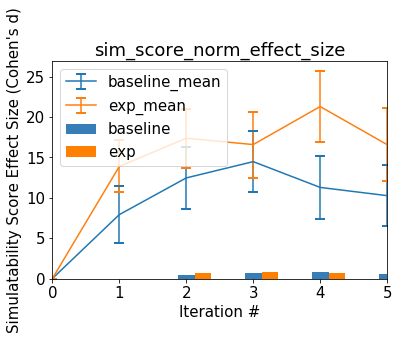

   baseline_err   exp_err
0      0.000000  0.000000
1      3.518086  3.220233
2      3.814811  3.640359
3      3.810170  4.093756
4      3.886482  4.343583
5      3.793859  4.478287


<Figure size 432x288 with 0 Axes>

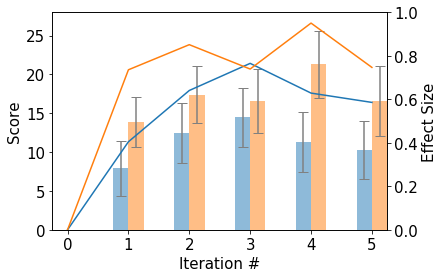

'multi'

C:\Users\Arnold\Documents\University of Toronto\Thesis\Release\analysis\data_viz.py:31: RuntimeWarning: invalid value encountered in true_divide
  d = abs(mean[0] - mean[1]) / pooled_std


Iteration: 1   Mean: 0.0   StD: 0.0   Count: 85
Iteration: 2   Mean: 7.197590361445784   StD: 28.116595116622875   Count: 83
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 80
Iteration: 2   Mean: 9.0   StD: 29.585780368278275   Count: 76
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 85
Iteration: 3   Mean: 8.510666666666667   StD: 30.233485880203563   Count: 75
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 80
Iteration: 3   Mean: 14.745714285714286   StD: 35.36980897833011   Count: 70
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 85
Iteration: 4   Mean: 11.610294117647058   StD: 34.423716831702215   Count: 68
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 80
Iteration: 4   Mean: 12.311764705882355   StD: 31.112950365103956   Count: 68
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 85
Iteration: 5   Mean: 10.477611940298507   StD: 29.27355731453094   Count: 67
Iteration: 1   Mean: 0.0   StD: 0.0   Count: 80
Iteration: 5   Mean: 16.72089552238806   StD: 33.00143494269299   Count: 67
Iteration: 1 

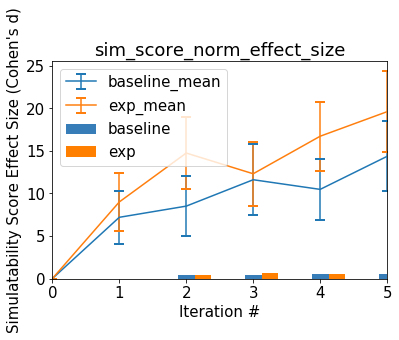

   baseline_err   exp_err
0      0.000000  0.000000
1      3.086197  3.393722
2      3.491062  4.227501
3      4.174489  3.772999
4      3.576334  4.031767
5      4.111313  4.719208


<Figure size 432x288 with 0 Axes>

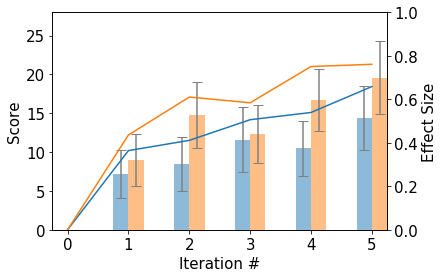

In [12]:
baseline_iter_num=1
ylim=(0, 28)
ylim2=(0, 1)
line_labels=['Effect Size - Baseline', 'Effect Size - Policy']
bar_labels=['Score - Baseline', 'Score - Policy']

font = {'weight' : 'normal',
        'size'   : 15}	
matplotlib.rc('font', **font)

titles = {'hm': 'Saliency Maps', 'proto': 'Prototypes', 'multi': 'Combined Explanations',
         'bl': 'Baseline', 'exp': 'Experimental'}

if not os.path.exists(fig_save_dir):
    os.makedirs(fig_save_dir)

# legend only in first plot
legend = True
for experiment in experiments:
    display(experiment)
    title = titles[experiment]
    experiments[experiment].plot_all_per_iter2('sim_score_norm', baseline_iter_num, ylim=ylim, ylim2=ylim2, 
                                              bar_labels=bar_labels, line_labels=line_labels, title=None,
                                              legend=legend, save_file=fig_save_dir+experiment+".png")
    # legend only in first plot
    legend = False

### Effect Size between different Explanations in a Batch

In [13]:
from scipy.stats import ttest_ind_from_stats

def df_pooled_std(std, count, num_actions):
    
    display(std)
    total_count = count.sum()
    pooled_std = np.sqrt(((count-1)*(std**2)).sum(0) / (total_count - num_actions))
    return pooled_std

def df_pooled_mean(mean, count):
    total_count = count.sum()
    pooled_mean = (count * mean).sum() / total_count
    return pooled_mean

def cohens_d(mean1, std1, count1, mean2, std2, count2):
    pooled_std = np.sqrt(((count1-1.0)*std1**2 + (count2-1.0)*std2**2) / (count1+count2-2))
    return abs(mean1 - mean2) / pooled_std

#### Local Simulatability
We observe the change in simulatability score after displaying local explanations to the user.  In particular, for each <strong>local simulatability score</strong>, we compare the mean difference (from the previous iteration) for corresponding and not corresponding explanations.

We compute the mean difference for each of the local simulatability scores.  We also compare within each experiment, difference between each batch and difference between corresponding and non-corresponding explanations.

In [14]:
classification_possibilities = ['tp', 'tn', 'fp', 'fn']

# normalize local simulatability scores
for experiment in experiments:
    for class_pos in classification_possibilities:
        experiments[experiment].baseline.normalize_values(['sim_score_'+class_pos])
        experiments[experiment].experimental.normalize_values(['sim_score_'+class_pos])

In [15]:
report_file = open(report_filename, 'a')

results_df  = {'experiment': [],
               'policy_corr_mean': [], 'policy_corr_std': [], 'policy_corr_count': [], 'policy_corr_se': [],
               'policy_uncorr_mean': [], 'policy_uncorr_std': [], 'policy_uncorr_count': [], 'policy_uncorr_se': [],
               'policy_effect_size': [], 'policy_p_value': [],
               'random_corr_mean': [], 'random_corr_std': [], 'random_corr_count': [], 'random_corr_se': [],
               'random_uncorr_mean': [], 'random_uncorr_std': [], 'random_uncorr_count': [], 'random_uncorr_se': [],
               'random_effect_size': [], 'random_p_value': [],
               'corr_effect_size': [], 'corr_p_value': [],
               'uncorr_effect_size': [], 'uncorr_p_value': []
              }

classification_possibilities = ['tp', 'tn', 'fp', 'fn']

total_count = {}
pooled_std = {}
pooled_mean = {}
num_actions = {}

report_file.write("-------LOCAL SIMULATABILITY SCORE PER LOCAL EXPLANATION------------\n\n")

for experiment in experiments:
    
    display(experiment)
    
    bl_df = experiments[experiment].baseline.get_explanation_effect_df('sim_score_norm', err="std")
    exp_df = experiments[experiment].experimental.get_explanation_effect_df('sim_score_norm', err="std")
    
    display(bl_df)
    display(exp_df)
    
    bl_df_string = bl_df.to_string()
    exp_df_string = exp_df.to_string()
    report_file.write(experiment+"_bl\n")
    report_file.write(bl_df_string+"\n\n")
    report_file.write(experiment+"_exp\n")
    report_file.write(exp_df_string+"\n\n")
    
    num_actions['bl'] = bl_df.shape[0]
    num_actions['exp'] = exp_df.shape[0]
    
    total_count['bl_uncorr'] = bl_df['uncorr_count'].sum()
    total_count['bl_corr'] = bl_df['corr_count'].sum()
    total_count['exp_uncorr'] = exp_df['uncorr_count'].sum()
    total_count['exp_corr'] = exp_df['corr_count'].sum()
    
    pooled_std['bl_uncorr'] = df_pooled_std(bl_df['uncorr_err'], bl_df['uncorr_count'], num_actions['bl'])
    pooled_std['exp_uncorr'] = df_pooled_std(exp_df['uncorr_err'], exp_df['uncorr_count'], num_actions['exp'])
    pooled_std['bl_corr'] = df_pooled_std(bl_df['corr_err'], bl_df['corr_count'], num_actions['bl'])
    pooled_std['exp_corr'] = df_pooled_std(exp_df['corr_err'], exp_df['corr_count'], num_actions['exp'])
    
    pooled_mean['bl_uncorr'] = df_pooled_mean(bl_df['uncorr_mean'], bl_df['uncorr_count'])
    pooled_mean['exp_uncorr'] = df_pooled_mean(exp_df['uncorr_mean'], exp_df['uncorr_count'])
    pooled_mean['bl_corr'] = df_pooled_mean(bl_df['corr_mean'], bl_df['corr_count'])
    pooled_mean['exp_corr'] = df_pooled_mean(exp_df['corr_mean'], exp_df['corr_count'])

    uncorr_effect_size = cohens_d(pooled_mean['bl_uncorr'], pooled_std['bl_uncorr'], total_count['bl_uncorr'], 
                          pooled_mean['exp_uncorr'], pooled_std['exp_uncorr'], total_count['exp_uncorr'])
    corr_effect_size = cohens_d(pooled_mean['bl_corr'], pooled_std['bl_corr'], total_count['bl_corr'], 
                          pooled_mean['exp_corr'], pooled_std['exp_corr'], total_count['exp_corr'])
    bl_effect_size = cohens_d(pooled_mean['bl_corr'], pooled_std['bl_corr'], total_count['bl_corr'], 
                          pooled_mean['bl_uncorr'], pooled_std['bl_uncorr'], total_count['bl_uncorr'])
    exp_effect_size = cohens_d(pooled_mean['exp_corr'], pooled_std['exp_corr'], total_count['exp_corr'], 
                          pooled_mean['exp_uncorr'], pooled_std['exp_uncorr'], total_count['exp_uncorr'])

    uncorr_p_value = ttest_ind_from_stats(pooled_mean['bl_uncorr'], pooled_std['bl_uncorr'], total_count['bl_uncorr'], 
                          pooled_mean['exp_uncorr'], pooled_std['exp_uncorr'], total_count['exp_uncorr'])[1]
    corr_p_value = ttest_ind_from_stats(pooled_mean['bl_corr'], pooled_std['bl_corr'], total_count['bl_corr'], 
                          pooled_mean['exp_corr'], pooled_std['exp_corr'], total_count['exp_corr'])[1]
    bl_p_value = ttest_ind_from_stats(pooled_mean['bl_uncorr'], pooled_std['bl_uncorr'], total_count['bl_uncorr'], 
                          pooled_mean['bl_corr'], pooled_std['bl_corr'], total_count['bl_corr'])[1]
    exp_p_value = ttest_ind_from_stats(pooled_mean['exp_uncorr'], pooled_std['exp_uncorr'], total_count['exp_uncorr'], 
                          pooled_mean['exp_corr'], pooled_std['exp_corr'], total_count['exp_corr'])[1]
    
    results_df['experiment'].append(experiment)
    results_df['policy_corr_mean'].append(pooled_mean['exp_corr'])
    results_df['policy_uncorr_mean'].append(pooled_mean['exp_uncorr'])
    results_df['random_corr_mean'].append(pooled_mean['bl_corr'])
    results_df['random_uncorr_mean'].append(pooled_mean['bl_uncorr'])
    results_df['policy_corr_std'].append(pooled_std['exp_corr'])
    results_df['policy_uncorr_std'].append(pooled_std['exp_uncorr'])
    results_df['random_corr_std'].append(pooled_std['bl_corr'])
    results_df['random_uncorr_std'].append(pooled_std['bl_uncorr'])
    results_df['policy_corr_count'].append(total_count['exp_corr'])
    results_df['policy_uncorr_count'].append(total_count['exp_uncorr'])
    results_df['random_corr_count'].append(total_count['bl_corr'])
    results_df['random_uncorr_count'].append(total_count['bl_uncorr'])
    
    results_df['policy_corr_se'].append(pooled_std['exp_corr']/np.sqrt(total_count['exp_corr']))
    results_df['policy_uncorr_se'].append(pooled_std['exp_uncorr']/np.sqrt(total_count['exp_uncorr']))
    results_df['random_corr_se'].append(pooled_std['bl_corr']/np.sqrt(total_count['bl_corr']))
    results_df['random_uncorr_se'].append(pooled_std['bl_uncorr']/np.sqrt(total_count['bl_uncorr']))
    
    results_df['random_effect_size'].append(bl_effect_size)
    results_df['policy_effect_size'].append(exp_effect_size)
    results_df['corr_effect_size'].append(corr_effect_size)
    results_df['uncorr_effect_size'].append(uncorr_effect_size)
    results_df['random_p_value'].append(bl_p_value)
    results_df['policy_p_value'].append(exp_p_value)
    results_df['corr_p_value'].append(corr_p_value)
    results_df['uncorr_p_value'].append(uncorr_p_value)

local_results_df = pd.DataFrame.from_dict(results_df)
local_results_df
report_file.close()

'hm'

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4355: RuntimeWarning: divide by zero encountered in true_divide
  denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


score  corr_mean   corr_err  corr_count  uncorr_mean  \
0  sim_score_tp_norm   7.100000  13.984317          91    -0.569004   
1  sim_score_tn_norm   9.079121  15.405948          91    -0.776384   
2  sim_score_fp_norm  -0.464444  20.451869          90     0.734926   
3  sim_score_fn_norm  -2.288889  12.928493          90    -1.301471   
4     sim_score_norm        NaN        NaN           0     1.949724   

   uncorr_err  uncorr_count  effect_size       p_value  
0   13.053309           271     0.576956  2.782248e-06  
1   12.048939           271     0.759875  1.023292e-09  
2   13.491186           272     0.077351  5.251231e-01  
3   10.752880           272     0.087153  4.740265e-01  
4   26.135821           362          NaN           NaN

score  corr_mean   corr_err  corr_count  uncorr_mean  \
0  sim_score_tp_norm  16.449091  13.898186          55    -1.692013   
1  sim_score_tn_norm  13.837374  14.739379          99    -3.103717   
2  sim_score_fp_norm   9.275000  16.867455         152    -4.693519   
3  sim_score_fn_norm   5.895161  12.363423          62    -2.587255   
4     sim_score_norm        NaN        NaN           0     2.391033   

   uncorr_err  uncorr_count  effect_size       p_value  
0   14.916469           313     1.228186  9.950641e-16  
1   11.670878           269     1.348151  3.199532e-26  
2   16.102175           216     0.850586  1.307728e-14  
3   10.513311           306     0.782250  3.857672e-08  
4   27.778091           368          NaN           NaN

0    13.053309
1    12.048939
2    13.491186
3    10.752880
4    26.135821
Name: uncorr_err, dtype: float64

0    14.916469
1    11.670878
2    16.102175
3    10.513311
4    27.778091
Name: uncorr_err, dtype: float64

0    13.984317
1    15.405948
2    20.451869
3    12.928493
4          NaN
Name: corr_err, dtype: float64

0    13.898186
1    14.739379
2    16.867455
3    12.363423
4          NaN
Name: corr_err, dtype: float64

'proto'

score  corr_mean   corr_err  corr_count  uncorr_mean  \
0  sim_score_tp_norm   9.655405  14.742011          74    -0.819816   
1  sim_score_tn_norm   8.240000  10.682797          75    -0.228704   
2  sim_score_fp_norm   0.243836  15.679923          73     0.063761   
3  sim_score_fn_norm  -4.013043  11.811621          69    -0.656757   
4     sim_score_norm        NaN        NaN           0     2.454296   

   uncorr_err  uncorr_count  effect_size       p_value  
0   14.757764           217     0.710002  2.617298e-07  
1   10.036311           216     0.829797  2.041956e-09  
2   12.808268           218     0.013260  9.219556e-01  
3   10.151777           222     0.317655  2.189329e-02  
4   25.229404           291          NaN           NaN

score  corr_mean   corr_err  corr_count  uncorr_mean  \
0  sim_score_tp_norm  23.592857  15.691063          42    -1.274653   
1  sim_score_tn_norm  11.485057  13.355110          87    -2.661728   
2  sim_score_fp_norm   8.412676  18.010662         142    -3.594149   
3  sim_score_fn_norm   5.611864  13.019536          59    -2.163100   
4     sim_score_norm        NaN        NaN           0     3.757576   

   uncorr_err  uncorr_count  effect_size       p_value  
0   13.601830           288     1.791583  1.250749e-23  
1   10.635065           243     1.239735  1.822214e-20  
2   14.740000           188     0.739930  1.189352e-10  
3   10.628360           271     0.701156  1.654332e-06  
4   25.661537           330          NaN           NaN

0    14.757764
1    10.036311
2    12.808268
3    10.151777
4    25.229404
Name: uncorr_err, dtype: float64

0    13.601830
1    10.635065
2    14.740000
3    10.628360
4    25.661537
Name: uncorr_err, dtype: float64

0    14.742011
1    10.682797
2    15.679923
3    11.811621
4          NaN
Name: corr_err, dtype: float64

0    15.691063
1    13.355110
2    18.010662
3    13.019536
4          NaN
Name: corr_err, dtype: float64

'multi'

score  corr_mean   corr_err  corr_count  uncorr_mean  \
0  sim_score_tp_norm   9.561364  15.499095          44     1.046497   
1  sim_score_tn_norm   7.845652  14.729678          46     0.196154   
2  sim_score_fp_norm  -2.204651  17.000097          43     1.526349   
3  sim_score_fn_norm  -3.285106  15.630613          47    -0.948232   
4  sim_score_tp_norm   5.923256  11.501467          43     1.570159   
5  sim_score_tn_norm   6.582222  15.028855          45     0.402236   
6  sim_score_fn_norm  -1.733333  18.812145          45    -1.186262   
7  sim_score_fp_norm   3.371111  22.812224          45     0.748562   
8     sim_score_norm        NaN        NaN           0     3.095251   

   uncorr_err  uncorr_count  effect_size   p_value  
0   13.747695           314     0.609471  0.000179  
1   13.731281           312     0.551854  0.000536  
2   15.230054           315     0.241498  0.138307  
3   12.418921           311     0.181448  0.247064  
4   14.499225           315     0.307019  0.059773  
5   13.787175           313     0.443117  0.005735  
6   11.833440           313     0.042402  0.790421  
7   14.134253           313     0.169495  0.288435  
8   25.939714           358          NaN       NaN

score  corr_mean   corr_err  corr_count  uncorr_mean  \
0  sim_score_tp_norm  22.120000  14.246914          15    -0.200904   
1  sim_score_tn_norm  15.406452  13.674451          31     1.332911   
2  sim_score_fp_norm   4.834722  14.581361          72     0.141091   
3  sim_score_fn_norm  -3.147059   9.642232          17    -0.841515   
4  sim_score_tp_norm  18.779070  15.352052          43    -1.784211   
5  sim_score_tn_norm  14.937500  14.586825          56     0.214089   
6  sim_score_fn_norm   6.293548  14.269850          31    -1.665506   
7  sim_score_fp_norm   5.674390  14.555461          82    -0.295849   
8     sim_score_norm        NaN        NaN           0     3.514697   

   uncorr_err  uncorr_count  effect_size       p_value  
0   15.319027           332     1.461080  6.167313e-08  
1   13.202150           316     1.062644  3.431954e-08  
2   13.768143           275     0.336717  1.141034e-02  
3   10.334241           330     0.223770  3.688841e-01  
4   14.286143           304     1.426013  9.441565e-17  
5   12.348605           291     1.156427  3.185834e-14  
6    9.563886           316     0.791090  3.355501e-05  
7   13.609801           265     0.431449  7.157402e-04  
8   24.576036           347          NaN           NaN

0    13.747695
1    13.731281
2    15.230054
3    12.418921
4    14.499225
5    13.787175
6    11.833440
7    14.134253
8    25.939714
Name: uncorr_err, dtype: float64

0    15.319027
1    13.202150
2    13.768143
3    10.334241
4    14.286143
5    12.348605
6     9.563886
7    13.609801
8    24.576036
Name: uncorr_err, dtype: float64

0    15.499095
1    14.729678
2    17.000097
3    15.630613
4    11.501467
5    15.028855
6    18.812145
7    22.812224
8          NaN
Name: corr_err, dtype: float64

0    14.246914
1    13.674451
2    14.581361
3     9.642232
4    15.352052
5    14.586825
6    14.269850
7    14.555461
8          NaN
Name: corr_err, dtype: float64

#### Overall Simulatability
We compare the change in <strong>overall</strong> simulatability score for each batch within an experiment. The change in overall simualtability score is weighted for each local explanation shown.

In [19]:
report_file = open(report_filename, 'a')

report_file.write("-------OVERALL SIMULATABILITY SCORE ACROSS ALL EXPLANATION------------\n\n")

results_df = {'experiment': [], 
              'bl_mean': [], 'bl_err': [], 'bl_count': [], 
              'exp_mean': [], 'exp_err': [], 'exp_count': [], 
              'effect_size': [], 'p_value': []}

for experiment in experiments:
    display(experiment)
    df = experiments[experiment].compare_scores_all_actions('sim_score_norm', err='se')
        
    results_df['experiment'].append(experiment)
    results_df['bl_mean'].append(df.iloc[0]['bl_mean'])
    results_df['bl_err'].append(df.iloc[0]['bl_err'])
    results_df['bl_count'].append(df.iloc[0]['bl_count'])
    results_df['exp_mean'].append(df.iloc[0]['exp_mean'])
    results_df['exp_err'].append(df.iloc[0]['exp_err'])
    results_df['exp_count'].append(df.iloc[0]['exp_count'])
    results_df['effect_size'].append(df.iloc[0]['effect_size'])
    results_df['p_value'].append(df.iloc[0]['p_value'])
    
overall_results_df = pd.DataFrame.from_dict(results_df)
display(overall_results_df)

results_string = overall_results_df.to_string()
report_file.write(results_string+"\n\n")
report_file.close()

'hm'

'proto'

'multi'

experiment   bl_mean    bl_err  bl_count  exp_mean   exp_err  exp_count  \
0         hm  1.949724  1.373668     362.0  2.391033  1.448033      368.0   
1      proto  2.454296  1.478974     291.0  3.757576  1.412621      330.0   
2      multi  3.095251  1.370956     358.0  3.514697  1.319311      347.0   

   effect_size   p_value  
0     0.016359  0.825160  
1     0.051189  0.524649  
2     0.016593  0.825727

We look at how the <strong>overall</strong> simulatability score were affected by each explanation.  We compare the effect of each explanation when selected by a rule-based policy and when selected by a random policy.

NOTE: We can only compare batches with the same explanations.

In [17]:
report_file = open(report_filename,'a')
report_file.write("-------OVERALL SIMULATABILITY SCORE PER LOCAL EXPLANATION------------\n\n")

for experiment in ['hm', 'proto', 'multi']:
    display(experiment)
    df = experiments[experiment].compare_scores_per_action('sim_score_norm')
    
    df_string = df.to_string()
    report_file.write(experiment+"\n")
    report_file.write(df_string+"\n\n")
    
    display(df)
    
report_file.close()

'hm'

name  action   bl_mean     bl_err  bl_count   exp_mean  \
0  rbp_heatmap_tp      26  4.720879  26.662827        91   4.274545   
1  rbp_heatmap_tn      27  3.553846  25.028705        91   1.371717   
2  rbp_heatmap_fp      28 -2.451111  30.435898        90   7.691447   
3  rbp_heatmap_fn      29  1.926667  21.492297        90 -10.646774   

     exp_err  exp_count  effect_size   p_value  
0  28.026279         55     0.016420  0.923543  
1  25.788524         99     0.085817  0.555277  
2  28.185976        152     0.349254  0.009198  
3  25.775193         62     0.538960  0.001354

'proto'

name  action   bl_mean     bl_err  bl_count   exp_mean  \
0  rbp_prototype_tp      30  9.395946  24.218822        74  16.450000   
1  rbp_prototype_tn      31  1.650667  23.909177        75   0.089655   
2  rbp_prototype_fp      32  2.995890  27.721499        73   6.865493   
3  rbp_prototype_fn      33 -4.689855  23.321085        69  -7.349153   

     exp_err  exp_count  effect_size   p_value  
0  31.058146         42     0.262430  0.177021  
1  21.975102         87     0.068196  0.665738  
2  23.583770        142     0.154420  0.284829  
3  26.445366         59     0.107194  0.546578

'multi'

name  action    bl_mean     bl_err  bl_count   exp_mean  \
0  rbp_multi_proto_tp      43  13.050000  28.081381        44  18.460000   
1  rbp_multi_proto_tn      44   1.293478  25.754813        46   9.051613   
2  rbp_multi_proto_fp      45  -4.374419  24.537766        43  -0.625000   
3  rbp_multi_proto_fn      46   3.957447  19.264461        47  -9.517647   
4     rbp_multi_hm_tp      47   0.458140  19.869230        43  10.111628   
5     rbp_multi_hm_tn      48   6.046667  22.817294        45   2.803571   
6     rbp_multi_hm_fn      49  -0.268889  22.415050        45  -3.603226   
7     rbp_multi_hm_fp      50   4.373333  38.222955        45   4.741463   

     exp_err  exp_count  effect_size   p_value  
0  36.056420         15     0.178928  0.551914  
1  22.559918         31     0.316312  0.177518  
2  25.165082         72     0.150375  0.436882  
3  26.635391         17     0.629355  0.029820  
4  28.324465         43     0.394585  0.070855  
5  23.039791         56     0.141366  0.481767  
6  22.396555         31     0.148804  0.525752  
7  18.999337         82     0.013459  0.942284

#### Combining Local and Overall Simulatability Scores
We combine the tables `local_results_df` and `overall_results_df` and calculate the p-value between them.

In [18]:
local_cols = ['experiment','policy_corr_mean', 'random_corr_mean', 'policy_corr_std', 'random_corr_std', 
              'policy_corr_se', 'random_corr_se', 'policy_corr_count', 'random_corr_count']
overall_cols = ['bl_mean', 'bl_err', 'bl_count', 'exp_mean', 'exp_err', 'exp_count']

combined_results_df = pd.concat([local_results_df[local_cols], overall_results_df[overall_cols]], axis=1)
combined_results_df['policy_p'] = ttest_ind_from_stats(combined_results_df['policy_corr_mean'],
                                                      combined_results_df['policy_corr_std'],
                                                      combined_results_df['policy_corr_count'],
                                                      combined_results_df['exp_mean'],
                                                      combined_results_df['exp_err'],
                                                      combined_results_df['exp_count'])[1]
combined_results_df['random_p'] = ttest_ind_from_stats(combined_results_df['random_corr_mean'],
                                                      combined_results_df['random_corr_std'],
                                                      combined_results_df['random_corr_count'],
                                                      combined_results_df['bl_mean'],
                                                      combined_results_df['bl_err'],
                                                      combined_results_df['bl_count'])[1]

display(combined_results_df)

report_file = open(report_filename,'a')
report_file.write("-------SUMMARY SIMULATABILITY------------\n\n")
combined_string = combined_results_df.to_string()
report_file.write(combined_string+"\n")
report_file.close()

experiment  policy_corr_mean  random_corr_mean  policy_corr_std  \
0         hm         11.005163          3.382597        15.212573   
1      proto         10.653939          3.688660        15.787344   
2      multi          9.822478          3.231844        14.381298   

   random_corr_std  policy_corr_se  random_corr_se  policy_corr_count  \
0        15.971281        0.793010        0.839432                368   
1        13.418858        0.869065        0.786627                330   
2        16.708573        0.772029        0.883076                347   

   random_corr_count   bl_mean    bl_err  bl_count  exp_mean   exp_err  \
0                362  1.949724  1.373668     362.0  2.391033  1.448033   
1                291  2.454296  1.478974     291.0  3.757576  1.412621   
2                358  3.095251  1.370956     358.0  3.514697  1.319311   

   exp_count      policy_p  random_p  
0      368.0  2.160662e-25  0.089434  
1      330.0  1.141848e-14  0.119367  
2      347.0  1.891223e-15  0.877527